In [1]:
import os
from PIL import Image
import torch
import torch.nn as nn
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
# from data_handler import testloader
# from model import ConvNet
from torchvision import models

In [2]:
model = models.resnext50_32x4d(pretrained = True)

inputs = model.fc.in_features
outputs = 6

model.fc = nn.Linear(inputs, outputs) 

model.load_state_dict( torch.load('model.pth') )

<All keys matched successfully>

In [3]:
# To visualize predictions
def view_classify(img, ps):
    labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

    class_pred = labels[np.argmax(ps, axis=1)]
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img)
    ax1.axis('off')
    ax2.barh(np.arange(6), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(6))
    ax2.set_yticklabels(np.arange(6))
    ax2.set_title(class_pred)
    ax2.set_xlim(0, 1.1)

In [4]:
test_transform = transforms.Compose([
                                        transforms.Resize((150,150)),
                                        # transforms.CenterCrop(124),
                                        transforms.ToTensor(),
                                        transforms.Normalize(
                                            mean=[0.485, 0.456, 0.406],
                                            std=[0.229, 0.224, 0.225])
        
                                    ])

In [5]:
# root_dir = 'E:\datasets\intel_images\seg_pred\\'
# for img_pth in os.listdir(root_dir):
#     img = Image.open(root_dir + img_pth)
#     img_transf = test_transform(img)

#     model.eval()
#     with torch.no_grad():
#         logit = model(img_transf.unsqueeze(0))
#     ps = nn.functional.softmax(logit, dim=1)
#     view_classify(img, ps)
#     plt.show()
#     time.sleep(3)
#     clear_output(wait=True)

street5.jpg


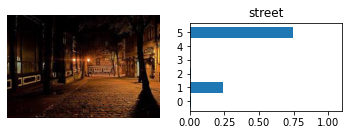

In [11]:
# Test on self downloaded images
root_dir = 'E:\strive_school\work\CHALLENGE\Chap3\cnn_intel_image\Test_images\\'
for img_pth in os.listdir(root_dir):
    img = Image.open(root_dir + img_pth)
    img_transf = test_transform(img)
    print(img_pth)
    model.eval()
    with torch.no_grad():
        logit = model(img_transf.unsqueeze(0))
    ps = nn.functional.softmax(logit, dim=1)
    view_classify(img, ps)
    plt.show()
    time.sleep(3)
    clear_output(wait=True)
